<a href="https://colab.research.google.com/github/DCabrini/detection_YOLO/blob/main/detection_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1  - Configurando Ambiente

Antes de iniciar a o código é importante configurar o colab para o uso d euma GPU.

In [1]:
# Verificando se a GPU foi inicializada
import tensorflow as tf
devive_name = tf.test.gpu_device_name()
print(devive_name)

# Retorno esperado "/device:GPU:0"

/device:GPU:0


O objetivo é efetuar um transfer learning do modelo pré treinado YOLO para um dataset de nossa escolha.\
Para esse projeto o dataset selecionado foi o Open Images Dataset V7.

Caracteristicas dataset Open Images Dataset V7:


- 15.851.536 caixas em 600 classes

- 2.785.498 segmentações de instância em 350 classes

- 3.284.280 anotações de relacionamento em 1466 relacionamentos

- 675.155 narrativas localizadas

- 66.391.027 anotações de nível de ponto em 5827 classes

- 61.404.966 rótulos de nível de imagem em 20638 classes

- Extensão - 478000 imagens de crowdsourcing com mais de 6000 classes

Site oficial: <a href="https://storage.googleapis.com/openimages/web/index.html" style="color:blue;">Open Images Dataset V7</a>.

Devido alto volume de imagens e classes será selecionado apenas uma classe e um número limitado de imagens.

# 2 - Importando Dados

Para manipular as imagens é necessério utilizar o "git clone" para baixar o repositório <a href="https://github.com/NanoCode012/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format" style="color:blue;">OIDv6 ToolKit Download Open Images Support Yolo Format</a>. Esse toolkit permite fazer o download de imagens e anotações do Open Images Dataset e convertê-las para o formato YOLO, facilitando o treinamento de modelos de detecção de objetos.

In [2]:
# Clonando OIDv6 Toolkit Repsitory
!git clone https://github.com/NanoCode012/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format.git

Cloning into 'OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format'...
remote: Enumerating objects: 548, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 548 (delta 2), reused 5 (delta 2), pack-reused 542 (from 1)
Receiving objects: 100% (548/548), 34.16 MiB | 15.92 MiB/s, done.
Resolving deltas: 100% (218/218), done.


In [3]:
# Instalando todas as bibliotecas necessárias para o funcionamento correto do Toolkit.
!pip3 install -r /content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.1.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.


In [1]:
# Atualizando a versão do docutils para evitar conflitos nos requerimentos do Toolkit.
!pip install docutils>=0.20,<

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install docutils>=0.20,<'


## 2.1 - Seleção de classes

As classes selecionadas para o presente projeto são:

- Bus


Número de imagens = 100


Como o objetivo é utilizar a YOLO para detecção de imagens, é importante mencionar que a YOLO necessita que os dados estejam em um formato especifico.
A especificações do formato dos dados pode ser encontrado na documentação <a href="https://docs.ultralytics.com/datasets/detect/" style="color:blue;">YOLO: Object Detection</a>.

Partindo dessa premissa os comandos, parametros e configurações utilizados podem ser encontrado em <a href="https://github.com/NanoCode012/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format" style="color:blue;">OIDv6 ToolKit Download Open Images Support Yolo Format</a>.



In [2]:
# Criando repositório Dataset para Download das iamgens OBS: É impressindível a criação desse repositório, sem ele não irá funcionar.
import os
os.makedirs('/content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/OID/Dataset/')

In [8]:
# Trocando para o diretório correto
cd /content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/

/content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format


In [10]:
# Selecionaando a classe desejada e efetuando o Download.
# OBS: O parametro "--yoloLabelStyle" efetua o o download das imagens já no formato da YOLO.
classes = 'Bus'
samples = 100

!python /content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/main.py downloader --classes {classes} --type_csv train --limit {samples} --yoloLabelStyle

    [INFO] |  saving dataset configurations at ./OID/Dataset/config.json

		   ___   _____  ______            _    _       _    _  
		 .'   `.|_   _||_   _ `.         | |  | |     | |  | |    
		/  .-.  \ | |    | | `. \ _   __ | |__| |_    |  | | |   
		| |   | | | |    | |  | |[ \ [  ]|____   _|     | | | 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_       | |
		 `.___.'|_____||______.'   \__/     |_____|     |_|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Bus.
   [ERROR] | Missing the train-annotations-bbox.csv fi

In [21]:
# Movendo o diretório para o content
!mv /content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/OID/Dataset/train/Bus /content/


### Criando arquivo .yaml

O arquivo .yaml é essencial para o treinamento da YOLO, pois define o caminho do conjunto de dados, especifica as pastas de treino e validação, além de mapear os nomes das classes. Ele garante que o modelo saiba onde buscar as imagens e as anotações corretas, facilitando o processo de aprendizado.

In [22]:
# Criar o conteúdo do arquivo .yaml
yaml_content = """path: /content/Bus
train: /content/Bus/images
val: /content/Bus/images

names:
  0: bus
"""

# Definir o caminho do arquivo
yaml_path = "/content/Bus/dataset.yaml"

# Criaando e escrevendo no arquivo YAML
with open(yaml_path, "w") as f:
    f.write(yaml_content)

# Verificar o conteúdo do arquivo
!cat /content/Bus/dataset.yaml

path: /content/Bus
train: /content/Bus/images
val: /content/Bus/images

names:
  0: bus


In [23]:
# Intalando biblioteca ultralytics
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.3/915.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [31]:
# Carregando Yolo e treinando modelo
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # Carregar modelo pré-treinado
model.train(data="/content/Bus/dataset.yaml", epochs=50, imgsz=640, batch=16)

Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Bus/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 71.0MB/s]


AMP: checks passed ✅


train: Scanning /content/Bus/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 277.51it/s]

train: New cache created: /content/Bus/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Bus/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.11G     0.8835      2.631       1.24         11        640: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]


                   all        100        156    0.00493      0.949      0.485      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.1G     0.8131       1.89      1.175         15        640: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]


                   all        100        156      0.885     0.0986       0.59      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.12G     0.8498      1.546      1.195         12        640: 100%|██████████| 7/7 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        100        156      0.749      0.306       0.53      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.11G     0.8664      1.374      1.185         15        640: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]


                   all        100        156      0.824      0.479      0.696      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.05G      0.844      1.368      1.174          9        640: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]


                   all        100        156       0.91      0.455      0.673      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.12G     0.9229      1.416      1.244         12        640: 100%|██████████| 7/7 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        100        156      0.783      0.577      0.663      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.04G     0.9026      1.359      1.196         10        640: 100%|██████████| 7/7 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]


                   all        100        156       0.73      0.558      0.612       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.13G     0.9434      1.434      1.242          7        640: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        100        156      0.734      0.564      0.637      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.13G      0.877      1.314      1.186         12        640: 100%|██████████| 7/7 [00:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]


                   all        100        156      0.727      0.583      0.647      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.12G     0.8852      1.217      1.221         18        640: 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        100        156      0.777      0.635      0.688      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.05G     0.8884      1.242      1.212         15        640: 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]


                   all        100        156      0.814      0.561      0.629      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.14G     0.8908      1.243      1.179         12        640: 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]


                   all        100        156      0.771      0.562      0.615      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.13G     0.9646      1.216      1.209         16        640: 100%|██████████| 7/7 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]


                   all        100        156      0.715      0.564      0.609      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.13G     0.9135      1.301      1.236          7        640: 100%|██████████| 7/7 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        100        156      0.612      0.449      0.474      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.12G     0.9548      1.206      1.242         16        640: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]


                   all        100        156      0.453      0.455       0.38      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.03G     0.9595      1.197      1.228         19        640: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all        100        156      0.521      0.468      0.482      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.13G     0.9845      1.192      1.313         14        640: 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]


                   all        100        156      0.594        0.5      0.505      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.13G     0.9468      1.229      1.248          7        640: 100%|██████████| 7/7 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]

                   all        100        156      0.498      0.369      0.376      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.12G     0.9051      1.067      1.197         17        640: 100%|██████████| 7/7 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]


                   all        100        156      0.464      0.468      0.439      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.05G     0.9259        1.1      1.286         18        640: 100%|██████████| 7/7 [00:01<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]


                   all        100        156      0.584      0.584      0.617      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.11G     0.8395      1.048       1.17         13        640: 100%|██████████| 7/7 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]


                   all        100        156       0.65      0.622      0.669      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.13G     0.8552      1.056      1.245          9        640: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]


                   all        100        156      0.711      0.532       0.61       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.12G     0.8572      1.017      1.233         12        640: 100%|██████████| 7/7 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]


                   all        100        156      0.753      0.705      0.745      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.05G     0.8198      0.956      1.132         18        640: 100%|██████████| 7/7 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        100        156      0.837      0.756      0.831      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.13G     0.8161     0.9925      1.179         12        640: 100%|██████████| 7/7 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        100        156      0.904      0.724      0.851      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.13G     0.8096     0.9368      1.142         20        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]


                   all        100        156      0.866      0.825      0.881      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.11G     0.7438     0.8846       1.11         15        640: 100%|██████████| 7/7 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        100        156      0.864      0.854      0.901      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.04G     0.8335     0.9611       1.15         10        640: 100%|██████████| 7/7 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all        100        156      0.884       0.84      0.894      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.11G     0.7951     0.8794      1.131         14        640: 100%|██████████| 7/7 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        100        156      0.914      0.859       0.91      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.13G     0.7763     0.8588      1.132         14        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        100        156      0.898      0.833      0.916      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.12G     0.7198     0.8744      1.103         22        640: 100%|██████████| 7/7 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all        100        156      0.901       0.84      0.925      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.07G     0.7274     0.8323      1.116         14        640: 100%|██████████| 7/7 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]


                   all        100        156      0.945      0.846      0.944      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.12G     0.6459     0.7696      1.038         18        640: 100%|██████████| 7/7 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]


                   all        100        156       0.92      0.888      0.942      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.05G     0.6935     0.7573      1.056         19        640: 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        100        156       0.93      0.857       0.94      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.13G     0.6984     0.7931      1.099         14        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]


                   all        100        156      0.957      0.808      0.943      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.05G     0.7024      0.746       1.05         19        640: 100%|██████████| 7/7 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]


                   all        100        156      0.934      0.878      0.952      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.13G     0.6618     0.7315      1.066         16        640: 100%|██████████| 7/7 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        100        156      0.928      0.909       0.96      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.07G     0.6153     0.7547      1.037         15        640: 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        100        156       0.94       0.91      0.963      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.12G       0.63     0.7142      1.068         14        640: 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all        100        156      0.958      0.883      0.967      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.07G     0.6537     0.7548      1.059         13        640: 100%|██████████| 7/7 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        100        156      0.965      0.891      0.968       0.83


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.11G     0.6817      1.265      1.086          7        640: 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        100        156      0.978      0.891      0.966       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.03G     0.5636     0.9291     0.9793          7        640: 100%|██████████| 7/7 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]


                   all        100        156      0.972      0.884      0.953      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.11G     0.6188     0.8816       1.01          7        640: 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        100        156      0.966      0.885      0.946      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.03G     0.5667     0.8087     0.9681          6        640: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        100        156      0.972      0.885      0.942      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.11G     0.5982     0.8734      1.001          8        640: 100%|██████████| 7/7 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        100        156      0.972      0.885      0.946      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.03G     0.5806     0.8829       1.03          6        640: 100%|██████████| 7/7 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        100        156      0.979      0.903      0.956      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       2.1G     0.5417     0.8479     0.9958          4        640: 100%|██████████| 7/7 [00:01<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]


                   all        100        156      0.973      0.926      0.966      0.857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.03G     0.5066       0.75     0.9492          4        640: 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all        100        156      0.974      0.929       0.97      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.11G     0.5143     0.7562     0.9597          6        640: 100%|██████████| 7/7 [00:01<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


                   all        100        156      0.993      0.918      0.971      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.03G     0.4937     0.7001     0.9724          4        640: 100%|██████████| 7/7 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        100        156       0.98       0.91      0.971      0.881



50 epochs completed in 0.064 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]


                   all        100        156       0.98       0.91      0.971      0.881
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7be00cd460d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

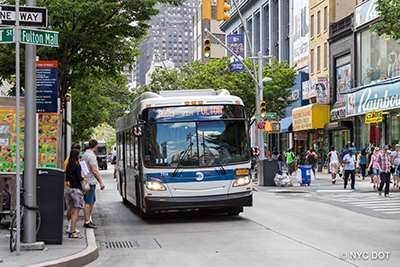

In [32]:
#Carregando Imagem para teste
from PIL import Image
import requests

url = 'https://www.nyc.gov/html/brt/images/photos/dot-b26-mta-bus-brooklyn.jpg'
im = Image.open(requests.get(url, stream=True).raw)
im


0: 448x640 1 bus, 45.0ms
Speed: 2.5ms preprocess, 45.0ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


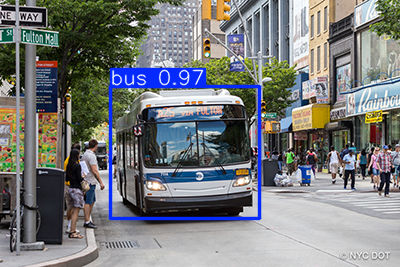

In [34]:
# Carregar o modelo treinado
model = YOLO("/content/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format/OID/Dataset/runs/detect/train5/weights/best.pt")

# Fazendo a inferência
results = model(im)

# Exibir a imagem com as detecções
results[0].show()